In [102]:
import csv
import pandas as pd
import numpy as np
import scipy.stats as st
from matplotlib import pyplot as plt
from pathlib import Path

In [48]:
csv_activity = Path("Resources/FitBitStudy/dailyActivity_merged.csv")
csv_sleep = Path("Resources/FitBitStudy/sleepDay_merged.csv")
csv_stress = Path("Resources/Stress_Health_Study/Sleep_health_and_lifestyle_dataset.csv")

In [49]:
csv_reader_activity = pd.read_csv(csv_activity)
csv_reader_sleep = pd.read_csv(csv_sleep)
csv_reader_stress = pd.read_csv(csv_stress)

In [50]:
csv_reader_activity.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


In [51]:
csv_reader_sleep.head(10)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016,1,327,346
1,1503960366,4/13/2016,2,384,407
2,1503960366,4/15/2016,1,412,442
3,1503960366,4/16/2016,2,340,367
4,1503960366,4/17/2016,1,700,712
5,1503960366,4/19/2016,1,304,320
6,1503960366,4/20/2016,1,360,377
7,1503960366,4/21/2016,1,325,364
8,1503960366,4/23/2016,1,361,384
9,1503960366,4/24/2016,1,430,449


In [52]:
csv_reader_sleep = csv_reader_sleep.rename(columns={"SleepDay" : "ActivityDate"})
csv_reader_sleep.head(10)

,Id,ActivityDate,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016,1,327,346
1,1503960366,4/13/2016,2,384,407
2,1503960366,4/15/2016,1,412,442
3,1503960366,4/16/2016,2,340,367
4,1503960366,4/17/2016,1,700,712
5,1503960366,4/19/2016,1,304,320
6,1503960366,4/20/2016,1,360,377
7,1503960366,4/21/2016,1,325,364
8,1503960366,4/23/2016,1,361,384
9,1503960366,4/24/2016,1,430,449


In [54]:
merged_df = pd.merge(csv_reader_activity, csv_reader_sleep, on=["Id", "ActivityDate"])
merged_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1,327,346
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2,384,407
2,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1,412,442
3,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2,340,367
4,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,1,700,712


In [55]:
merged_df.shape

(413, 18)

In [56]:
merged_df[merged_df["TotalMinutesAsleep"].isnull()].shape

(0, 18)

In [57]:
merged_df["TotalHoursAsleep"] = merged_df["TotalMinutesAsleep"]/60
merged_df

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalHoursAsleep
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1,327,346,5.450000
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2,384,407,6.400000
2,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1,412,442,6.866667
3,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2,340,367,5.666667
4,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,1,700,712,11.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,8792009665,4/30/2016,7174,4.59,4.59,0.0,0.33,0.36,3.91,0.0,10,20,301,749,2896,1,343,360,5.716667
409,8792009665,5/1/2016,1619,1.04,1.04,0.0,0.00,0.00,1.04,0.0,0,0,79,834,1962,1,503,527,8.383333
410,8792009665,5/2/2016,1831,1.17,1.17,0.0,0.00,0.00,1.17,0.0,0,0,101,916,2015,1,415,423,6.916667
411,8792009665,5/3/2016,2421,1.55,1.55,0.0,0.00,0.00,1.55,0.0,0,0,156,739,2297,1,516,545,8.600000


In [58]:
merged_df["VeryActiveHours"] = merged_df["VeryActiveMinutes"]/60
merged_df

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalHoursAsleep,VeryActiveHours
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1,327,346,5.450000,0.416667
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2,384,407,6.400000,0.350000
2,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1,412,442,6.866667,0.483333
3,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2,340,367,5.666667,0.600000
4,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,1,700,712,11.666667,0.633333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,8792009665,4/30/2016,7174,4.59,4.59,0.0,0.33,0.36,3.91,0.0,10,20,301,749,2896,1,343,360,5.716667,0.166667
409,8792009665,5/1/2016,1619,1.04,1.04,0.0,0.00,0.00,1.04,0.0,0,0,79,834,1962,1,503,527,8.383333,0.000000
410,8792009665,5/2/2016,1831,1.17,1.17,0.0,0.00,0.00,1.17,0.0,0,0,101,916,2015,1,415,423,6.916667,0.000000
411,8792009665,5/3/2016,2421,1.55,1.55,0.0,0.00,0.00,1.55,0.0,0,0,156,739,2297,1,516,545,8.600000,0.000000


In [59]:
merged_df["SedentaryHours"] = merged_df["SedentaryMinutes"]/60
merged_df

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalHoursAsleep,VeryActiveHours,SedentaryHours
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,13,328,728,1985,1,327,346,5.450000,0.416667,12.133333
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,19,217,776,1797,2,384,407,6.400000,0.350000,12.933333
2,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,...,34,209,726,1745,1,412,442,6.866667,0.483333,12.100000
3,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,...,10,221,773,1863,2,340,367,5.666667,0.600000,12.883333
4,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,...,20,164,539,1728,1,700,712,11.666667,0.633333,8.983333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,8792009665,4/30/2016,7174,4.59,4.59,0.0,0.33,0.36,3.91,0.0,...,20,301,749,2896,1,343,360,5.716667,0.166667,12.483333
409,8792009665,5/1/2016,1619,1.04,1.04,0.0,0.00,0.00,1.04,0.0,...,0,79,834,1962,1,503,527,8.383333,0.000000,13.900000
410,8792009665,5/2/2016,1831,1.17,1.17,0.0,0.00,0.00,1.17,0.0,...,0,101,916,2015,1,415,423,6.916667,0.000000,15.266667
411,8792009665,5/3/2016,2421,1.55,1.55,0.0,0.00,0.00,1.55,0.0,...,0,156,739,2297,1,516,545,8.600000,0.000000,12.316667


In [ ]:
merged_df = merged_df[merged_df["VeryActiveHours"]]

In [60]:
merged_df.to_csv("Resources/FitBitStudy/CleanFitbitData.csv")

In [24]:
#Data Analysis

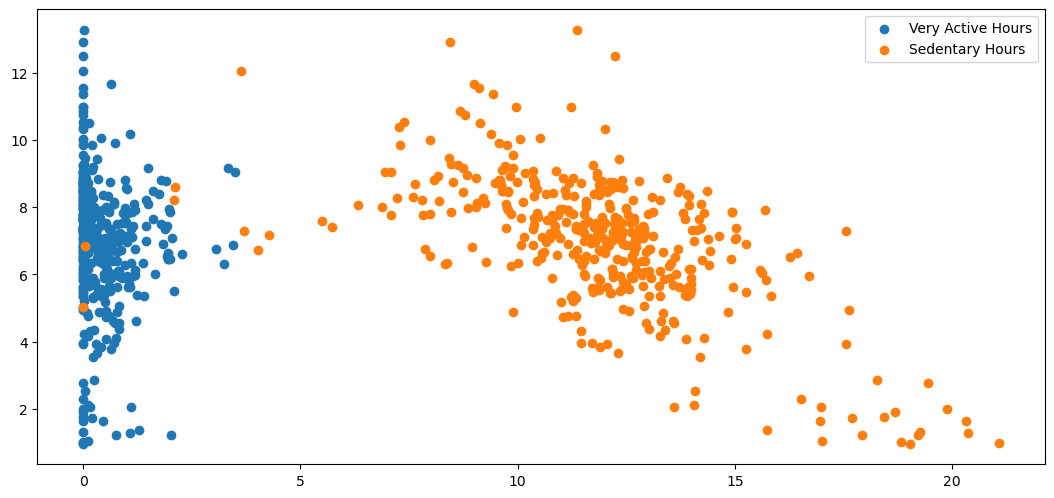

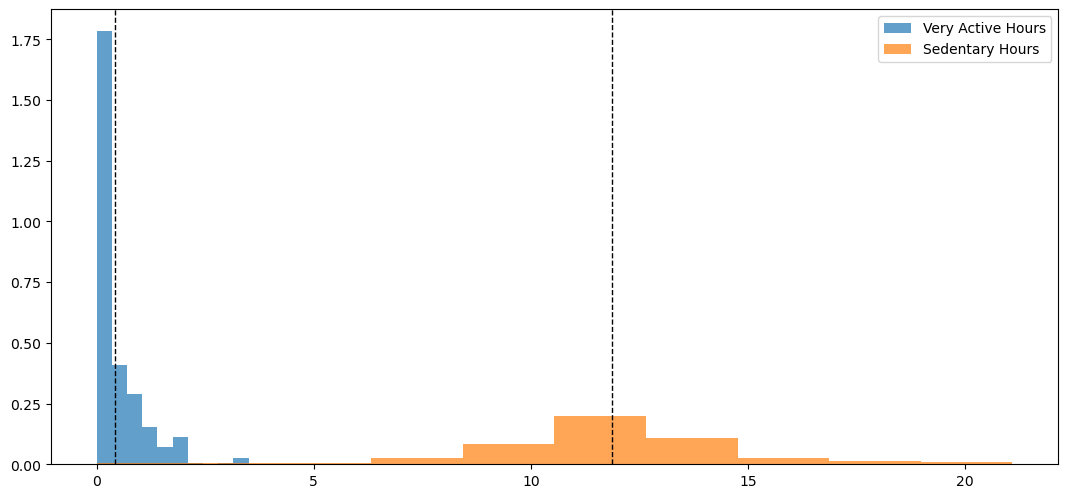

In [97]:
very_active = merged_df["VeryActiveHours"]
sedentary = merged_df["SedentaryHours"]
asleep = merged_df["TotalHoursAsleep"]

#Scatter Plot of Sedentary and Active 
plt.subplot(2, 1, 1)
plt.scatter(very_active, asleep, label="Very Active Hours")
plt.scatter(sedentary, asleep, label="Sedentary Hours")
plt.rcParams["figure.figsize"] = [13, 13]
plt.legend()
plt.show()

#Histogram
plt.subplot(2, 1, 2)
plt.hist(very_active, 10, density=True, alpha=0.7, label="Very Active Hours")
plt.hist(sedentary, 10, density=True, alpha=0.7, label="Sedentary Hours")
plt.axvline(very_active.mean(), color="k", linestyle="dashed", linewidth=1)
plt.axvline(sedentary.mean(), color="k", linestyle="dashed", linewidth=1)
plt.legend()
plt.show()

LinregressResult(slope=-0.294124366097534, intercept=7.114599506881059, rvalue=-0.09043627943527563, pvalue=0.06634642325229892, stderr=0.15976590986322928, intercept_stderr=0.11774640616352836)

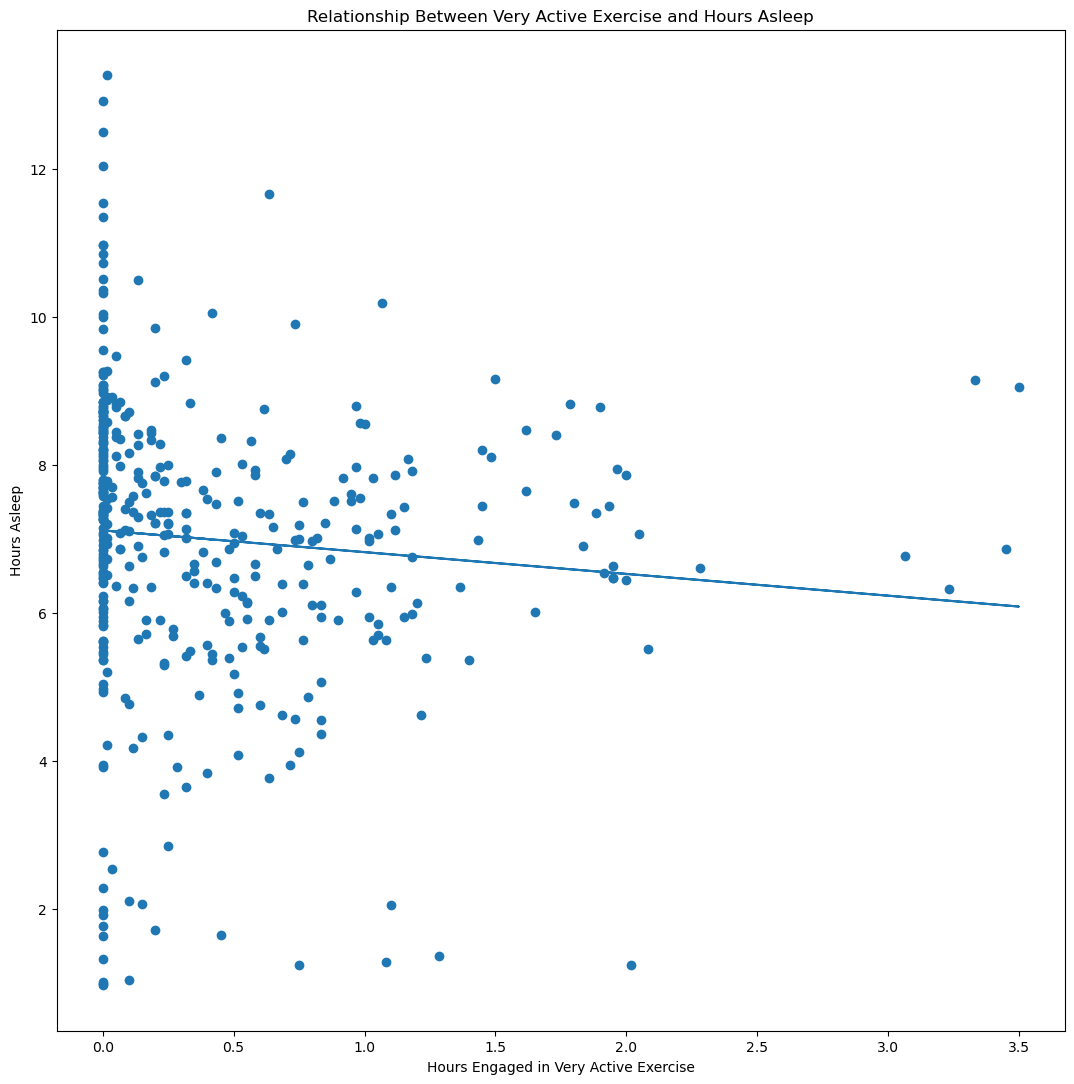

In [160]:
#Linear Regression for Very Active Minutes

slope_active = -0.294124366097534
x_active = very_active
intercept_active = 7.114599506881059
Best_Fit_Line_active = slope_active*x_active + intercept_active

plt.scatter(very_active, asleep, label="Very Active Hours")
plt.plot(very_active, Best_Fit_Line_active)
plt.xlabel("Hours Engaged in Very Active Exercise")
plt.ylabel("Hours Asleep")
plt.title("Relationship Between Very Active Exercise and Hours Asleep")
st.pearsonr(very_active, asleep)
st.linregress(very_active, asleep)

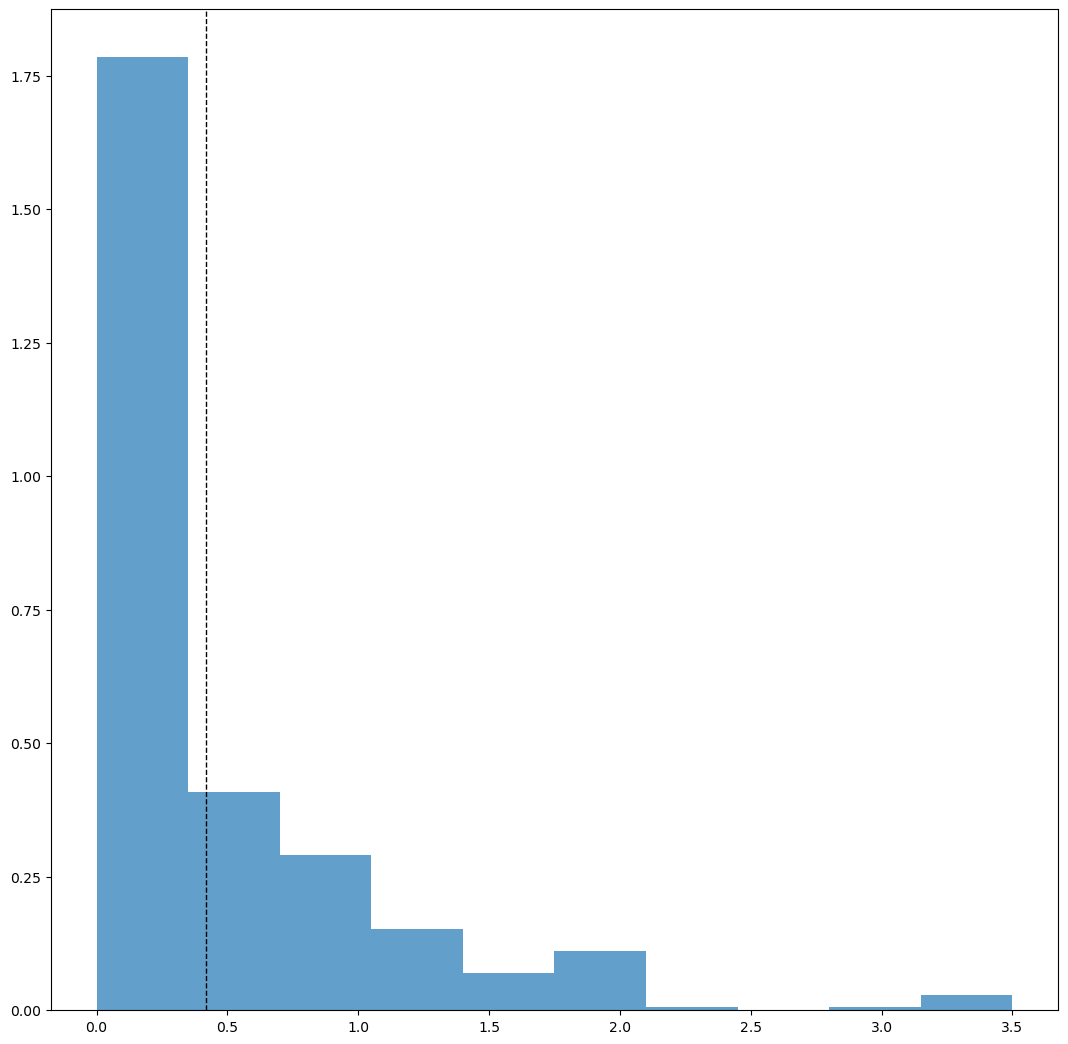

In [163]:
#Histogram for Very Active Duration
plt.hist(very_active, 10, density=True, alpha=0.7, label="Very Active Hours")
plt.axvline(very_active.mean(), color="k", linestyle="dashed", linewidth=1)
plt.show()

LinregressResult(slope=-0.42742943478885836, intercept=12.064491926420814, rvalue=-0.59939400560339, pvalue=1.2203079455433338e-41, stderr=0.02815578069637591, intercept_stderr=0.3431274008972535)

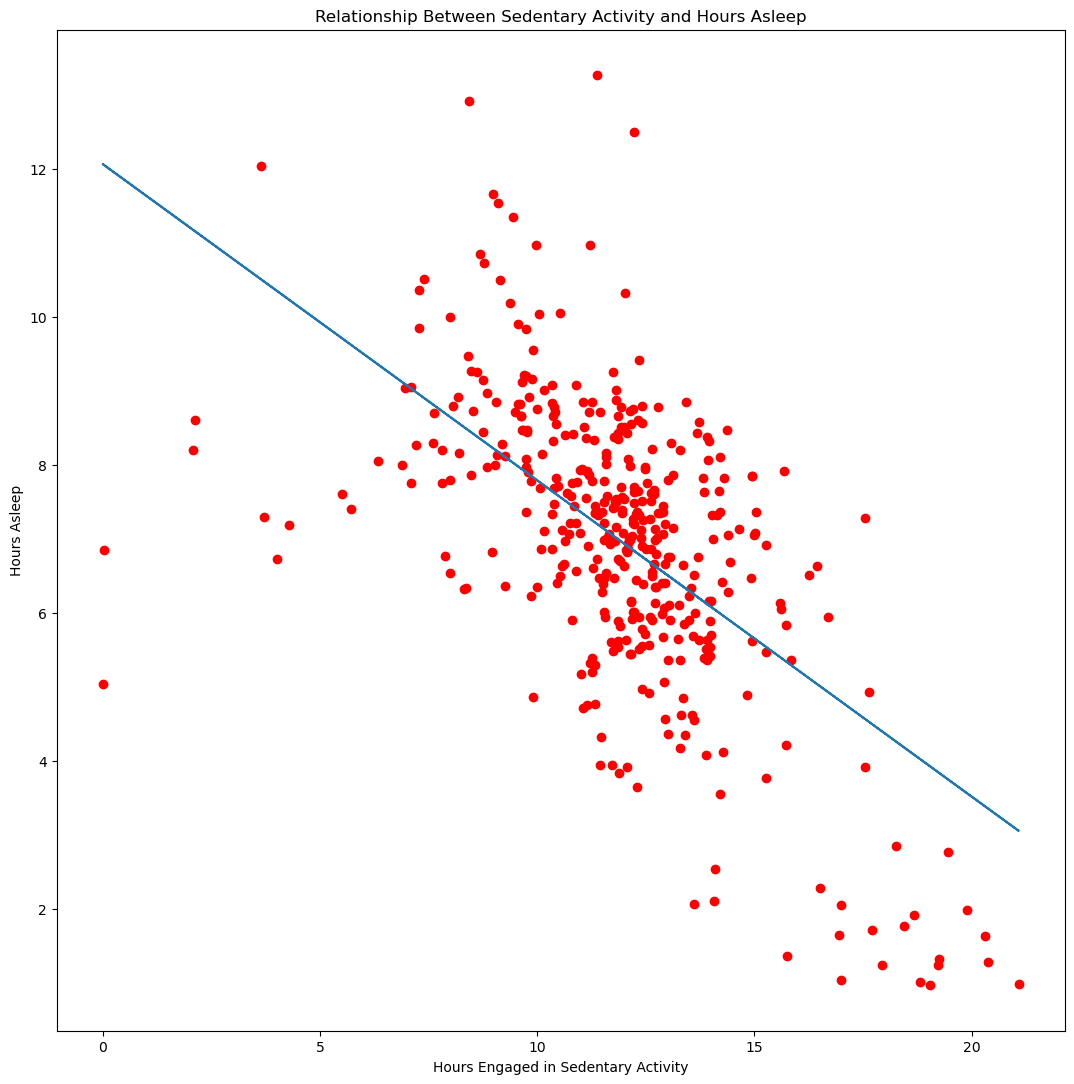

In [152]:
#Linear Regression for Sedentary Minutes

slope_sedentary = -0.42742943478885836
x_sedentary = sedentary
intercept_sedentary = 12.064491926420814
Best_Fit_Line_Sedentary = slope_sedentary*x_sedentary + intercept_sedentary

plt.scatter(sedentary, asleep, color = "r", label="Sedentary Hours")
plt.plot(sedentary, Best_Fit_Line_Sedentary)
plt.xlabel("Hours Engaged in Sedentary Activity")
plt.ylabel("Hours Asleep")
plt.title("Relationship Between Sedentary Activity and Hours Asleep")
st.pearsonr(sedentary, asleep)
st.linregress(sedentary, asleep)

In [ ]:
#Stress Dataset

In [115]:
csv_reader_stress = pd.read_csv(csv_stress)
stress_dataset = csv_reader_stress
stress_dataset

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


LinregressResult(slope=-0.36364402072463375, intercept=9.090318336201637, rvalue=-0.8110230278940435, pvalue=1.2378076181534697e-88, stderr=0.013599978596185735, intercept_stderr=0.07710004962920462)

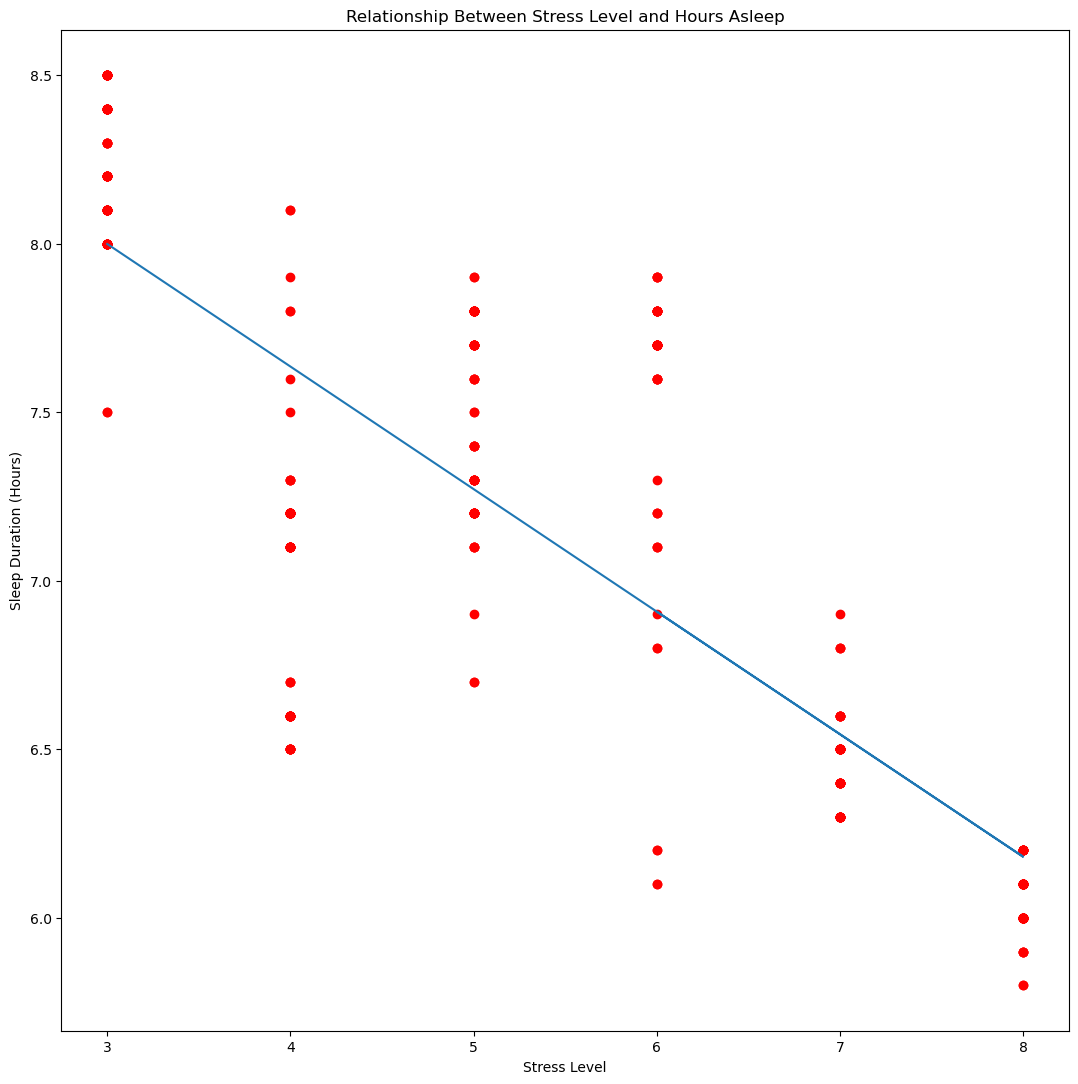

In [151]:
stress_level = stress_dataset["Stress Level"]
sleep_duration = stress_dataset["Sleep Duration"]

slope = -0.36364402072463375
intercept = 9.090318336201637
x = stress_level
Best_Fit_Line = slope*x + intercept

plt.scatter(stress_level, sleep_duration, color = "r", label="Level of Self-Reported Stress")
plt.plot(stress_level, Best_Fit_Line)
plt.xlabel("Stress Level")
plt.ylabel("Sleep Duration (Hours)")
plt.title("Relationship Between Stress Level and Hours Asleep")
st.pearsonr(stress_level, sleep_duration)
st.linregress(stress_level, sleep_duration)

In [155]:
#Equations for Stress Level
RSquared_Value_Stress = -0.8110230278940435*-0.8110230278940435
print(f"{RSquared_Value_Stress}")

0.6577583517744224


In [157]:
#Equations for Sedentary time
RSquared_Value_Sedentary = -0.59939400560339*-0.59939400560339
print(f"{RSquared_Value_Sedentary}")

0.3592731739532767


In [158]:
#Equations for Active Time
RSquared_Value_Active = -0.09043627943527563*-0.09043627943527563
print(f"{RSquared_Value_Active}")

0.008178720638095258
